In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
    

In [2]:
# get teh data
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

cdata = pd.read_csv(city_data)
rdata = pd.read_csv(ride_data)

In [3]:
# observed in the data:
#     the higher the population density, the more rides and lower fares
#     much higher variation in rural data than suburban or urban
#     One suburban datapoint could be an outlier

In [4]:
# look at the data

# len(rdata) = 2375
# len(cdata) = 126
# cdata columns: city, driver_count, type
# rdata columns:  city, date, fare, ride_id
# i'm going to left join cdata to rdata


In [5]:
data = pd.merge(rdata, cdata, how='left', on='city')
data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [6]:
# need the groups
    # Average Fare ($) Per City
    # Total Number of Rides Per City
    # Total Number of Drivers Per City
    # City Type (Urban, Suburban, Rural)

In [7]:
# break data into fare by type 
# example:df[df['ids'].str.contains("ball")]
fare_u=data[data['type'].str.contains("Urban")]
fare_s=data[data['type'].str.contains("Suburban")]
fare_r=data[data['type'].str.contains("Rural")]
# fare_s.head()

In [8]:
# average fair by city
avg_fare=rdata.groupby('city')['fare'].mean()
# avg_fare # uncomment to see data

# avg fare by city and type so i can make the colors different
# there may be a better way to do this, but this works.
avg_fare_u=fare_u.groupby('city')['fare'].mean()
avg_fare_s=fare_s.groupby('city')['fare'].mean()
avg_fare_r=fare_r.groupby('city')['fare'].mean()
# avg_fare_u # uncomment to see results


In [9]:
# count of rides by city
cnt_rides=rdata.groupby('city')['ride_id'].count()
# cnt_rides # uncomment to see data

# break data out by type
cnt_u=data[data['type'].str.contains("Urban")]
cnt_s=data[data['type'].str.contains("Suburban")]
cnt_r=data[data['type'].str.contains("Rural")]
# cnt_r

In [10]:
# group each count by tyype on city and count them
cnt_rides_u=cnt_u.groupby('city')['ride_id'].count()
cnt_rides_s=cnt_s.groupby('city')['ride_id'].count()
cnt_rides_r=cnt_r.groupby('city')['ride_id'].count()
# cnt_rides_r

In [11]:
# sum_fare=rdata.groupby('city')['fare'].sum()  # didn't need this.

In [12]:
cnt_drivers=cdata.groupby('city')['driver_count'].sum()

In [13]:
rides_fares_df = pd.concat([cnt_rides, avg_fare], axis=1).reset_index()
# rides_fairs_df.head()  # uncomment to see data

In [14]:
# rename the columns
rides_fares_df.columns=('city','Total Number of Rides Per City','Average Fare ($) Per City')
# rides_fairs_df.head() # uncomment to see data

In [15]:
plt_data = pd.merge(cdata, rides_fares_df, how='left', on='city')
plt_data.head()

,city,driver_count,type,Total Number of Rides Per City,Average Fare ($) Per City
0,Kelseyland,63,Urban,28,21.806429
1,Nguyenbury,8,Urban,26,25.899615
2,East Douglas,12,Urban,22,26.169091
3,West Dawnfurt,34,Urban,29,22.330345
4,Rodriguezburgh,52,Urban,23,21.332609


<function matplotlib.pyplot.show>

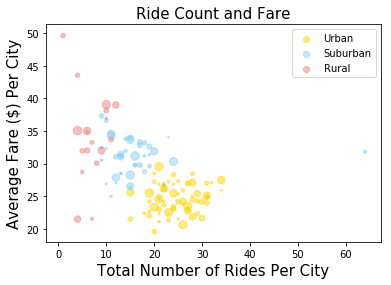

In [16]:


fig, ax = plt.subplots()

plt.scatter(cnt_rides_u,avg_fare_u, c='gold', s=cnt_drivers, alpha=0.5, label='Urban')
plt.scatter(cnt_rides_s,avg_fare_s, c='lightskyblue', s=cnt_drivers, alpha=0.5, label='Suburban')
plt.scatter(cnt_rides_r,avg_fare_r, c='lightcoral', s=cnt_drivers, alpha=0.5, label='Rural')
ax.set_xlabel(r'Total Number of Rides Per City', fontsize=15)
ax.set_ylabel(r'Average Fare ($) Per City', fontsize=15)
ax.set_title('Ride Count and Fare', fontsize=15)
ax.legend()
plt.show

In [17]:
# help(plt.scatter)

In [18]:
# % of Total Fares by City Type
fare_type=data.groupby('type')['fare'].sum()
# fare_type

In [19]:
# % of Total Rides by City Type
ride_type=data.groupby('type')['ride_id'].count()
# ride_type

In [20]:
# % of Total Drivers by City Type
driver_type=data.groupby('type')['driver_count'].sum()
# driver_type

In [21]:
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]


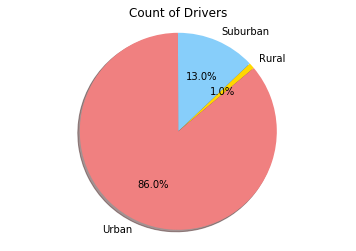

In [22]:
# Creates the pie chart based upon the values above

plt.pie(driver_type, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=40)
plt.title('Count of Drivers')
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()

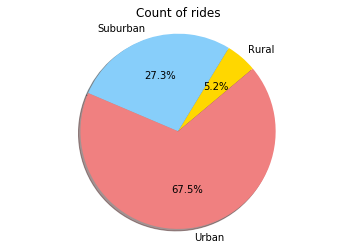

In [23]:
# Creates the pie chart based upon the values above

plt.pie(ride_type, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=40)
plt.title('Count of rides')
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Prints our pie chart to the screen
plt.show()

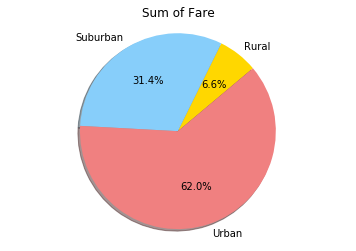

In [24]:
# Creates the pie chart based upon the values above

plt.pie(fare_type, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=40)
plt.title('Sum of Fare')
# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")
# Prints our pie chart to the screen
plt.show()